In [41]:
pip uninstall keras tensorflow



SyntaxError: invalid syntax (2576405860.py, line 1)

In [9]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 325.1 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.1 MB 544.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.1 MB 798.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/2.1 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.1 MB 1.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.1 MB 2.1 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 3.4 MB/s eta 0:00:01
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:

import numpy as np
import pandas as pd
import keras     
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [3]:

import tensorflow
tensorflow.__version__

'2.15.0'

In [2]:
df = pd.read_csv("train2.csv")
base_path ="./images/"

In [3]:
df

,id,landmark_id
0,6e158a47eb2ca3f6,142820
1,202cd79556f30760,104169
2,3ad87684c99c06e1,37914
3,e7f70e9c61e66af3,102140
4,4072182eddd0100e,2474
...,...,...
4132909,fc0f007893b11ba7,172138
4132910,39aad18585867916,162860
4132911,fd0725460e4ebbec,191243
4132912,73691ae29e24ba19,145760


In [4]:

df = df.loc[df["id"].str.startswith(('b1'), na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [5]:
df

,id,landmark_id
103,b12bc9433c1dd4a4,31194
368,b1d325db281aecc4,14569
450,b130d1e5efd7b7ee,40530
705,b19a8e2a9f0459f9,15427
993,b15a09a93e2a9320,26686
...,...,...
4131499,b129366d9394c75a,54142
4131924,b19a4a75942aacf3,57416
4132110,b1600bf5df2762e8,91476
4132158,b1345ce61884d8cb,16356


In [6]:
num_classes

13668

In [7]:
num_data

16228

In [8]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,48
1,62798,19
2,176528,15
3,86869,11
4,113209,10


In [9]:
data.tail()

,landmark_id,count
13663,92881,1
13664,158344,1
13665,171681,1
13666,90410,1
13667,143684,1


In [10]:
data.columns=['landmark_id','count']


In [11]:
data['count'].describe()

count    13668.000000
mean         1.187299
std          0.733369
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         48.000000
Name: count, dtype: float64

(array([0.0000e+00, 1.1904e+04, 0.0000e+00, 1.3330e+03, 2.8000e+02,
        0.0000e+00, 8.2000e+01, 3.1000e+01, 0.0000e+00, 1.2000e+01,
        1.2000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

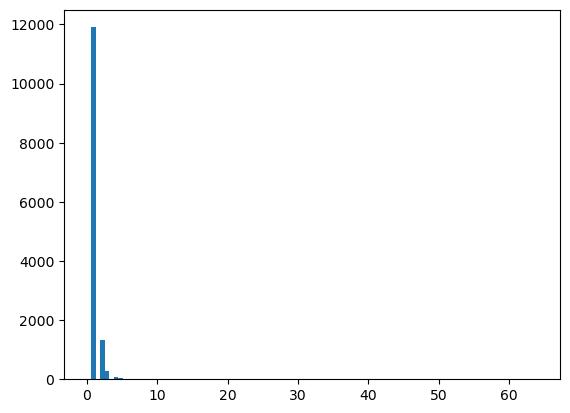

In [12]:
plt.hist(data['count'], 100, range = (0,64), label = 'test')

In [13]:
data['count'].between(0,5).sum()

13630

In [14]:
data['count'].between(5,10).sum()

65

(array([1., 4., 1., ..., 1., 1., 3.]),
 array([1.10000e+01, 2.70000e+01, 4.30000e+01, ..., 2.03045e+05,
        2.03071e+05, 2.03085e+05]),
 <BarContainer object of 13667 artists>)

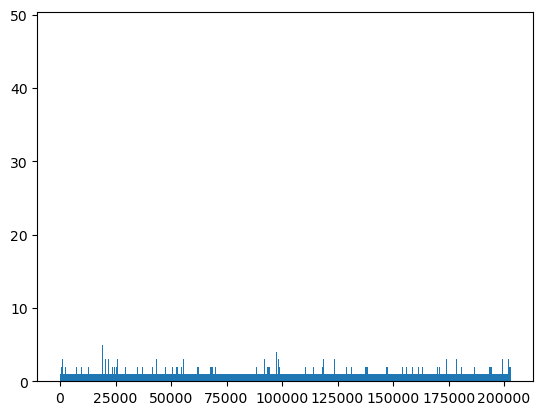

In [15]:
unique_landmark_ids = df["landmark_id"].unique()
unique_landmark_ids.sort()  

plt.hist(df["landmark_id"], bins=unique_landmark_ids)

In [16]:
# Training of Model
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [18]:
df.head()

,id,landmark_id
103,b12bc9433c1dd4a4,31194
368,b1d325db281aecc4,14569
450,b130d1e5efd7b7ee,40530
705,b19a8e2a9f0459f9,15427
993,b15a09a93e2a9320,26686


In [19]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [20]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [21]:
def get_image_from_number(num):
    fname, label = df.loc[num,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

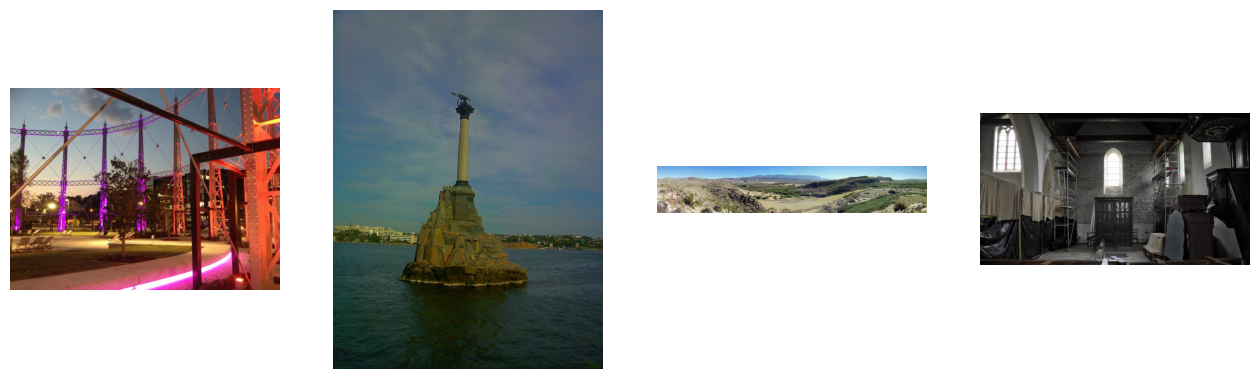

In [22]:
fig=plt.figure(figsize=(16, 16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path+'/'+'b'+'/'+'1'+'/'+ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [23]:
import tensorflow as tf


In [24]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [25]:

learning_rate = 0.0001
decay_speed   = 1e-6
momemtum      = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model  = VGG19(weights=None)
drop_layer    = Dropout(0.5)
drop_layer2   = Dropout(0.5)

In [26]:
model = Sequential()
for layer in source_model.layers[:-1]: # go through until last layer
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [28]:

pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD


In [27]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

In [28]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [29]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    end_img = start+batch_size
    if(end_img) > len(dataframe):
        end_img = len(dataframe)
    
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    
    label_array = encode_label(label_array)
    
    return np.array(image_array), np.array(label_array)

In [34]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 15

# split
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

12982
3246


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [31]:
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer
rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [32]:
import tensorflow.keras as keras


In [33]:
train, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
print("Training on:", len(train), "samples")
print("Validation on:", len(validate), "samples")
for e in range(epochs):
    print("Epoch: ", str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        model.train_on_batch(X_train, y_train)
model.save("Model.h5")

Training on: 12982 samples
Validation on: 3246 samples
Epoch:  1/15




ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (16, 224, 224, 3)

In [60]:
# Test
batch_size = 16

errors = 0
good_preds = []
bad_preds = []


for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)
    
    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])



ValueError: Error when checking input: expected dense_3_input to have 2 dimensions, but got array with shape (16, 224, 224, 3)

In [ ]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

In [65]:
fig=plt.figure(figsize=(16, 16))
for i in range(1,6):
    n = int(good_preds[i,0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not tuple

<Figure size 1600x1600 with 0 Axes>